# **Download The Dataset**

In [ ]:
# Download the dataset
!wget https://github.com/karoldvl/ESC-50/archive/master.zip

# Unzip dataset and delete zip file
!unzip /content/master.zip && rm /content/master.zip


--2025-11-22 23:52:15--  https://github.com/karoldvl/ESC-50/archive/master.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/karolpiczak/ESC-50/archive/master.zip [following]
--2025-11-22 23:52:16--  https://github.com/karolpiczak/ESC-50/archive/master.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master [following]
--2025-11-22 23:52:16--  https://codeload.github.com/karolpiczak/ESC-50/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.205.243.165
Connecting to codeload.github.com (codeload.github.com)|20.205.243.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip            

# **Audio Signal Processing**

## **Music Feature Extraction in Python**
[link](https://towardsdatascience.com/extract-features-of-music-75a3f9bc265d)


1.   **Amplitude** of Sound is the strength or level of sound pressure. The SI unit of Amplitude is the **decibel** (dB).

2.   An audio **frequency** or audible frequency (AF) is a periodic vibration whose frequency is in the band audible to the average human, the human hearing range. The SI unit of frequency is the **hertz** (Hz). It is the property of sound that most determines pitch.

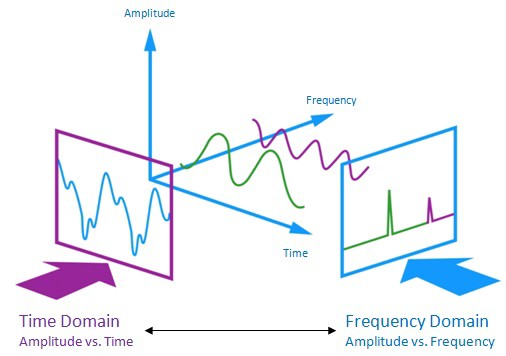

In [ ]:
# Librosa is a Python module to analyze audio signals
!pip install librosa


In [ ]:
# Loading an audio file
import librosa
audio_data = "/content/ESC-50-master/audio/1-100038-A-14.wav"
# audio_data = "/content/ESC-50-master/audio/1-101336-A-30.wav"

# sr = sampling rate. It is the number of samples per second.
# 20 Hz to 20 kHz is the audible range for human beings. we used 20000Hz
x , sr = librosa.load(audio_data, sr=20000)
print(type(x), type(sr))

# Play the audio
import IPython.display as ipd
ipd.Audio(audio_data)


<class 'numpy.ndarray'> <class 'int'>


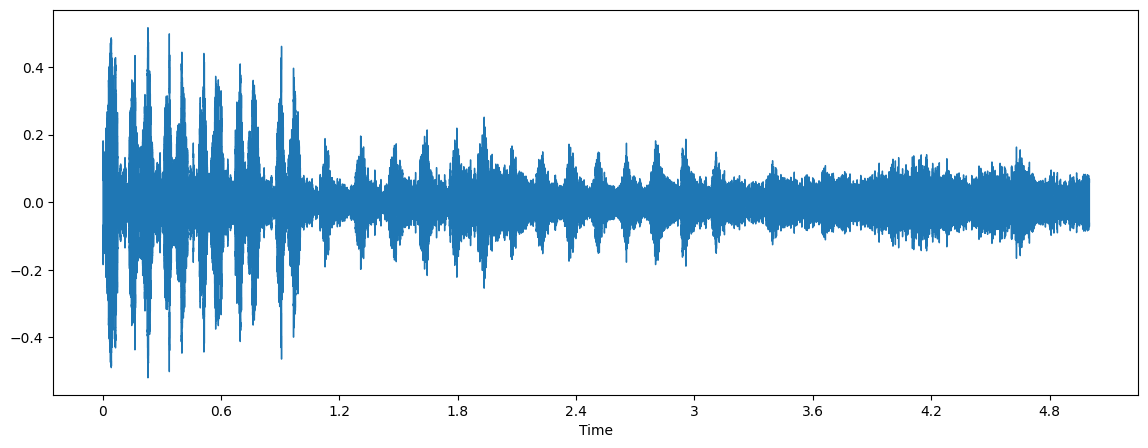

In [ ]:
"""
Visualizing Audio:
We can plot the audio array using librosa.display.waveplot.
Waveplots let us know the loudness of the audio at a given time.
Time - Amplitude
"""
import matplotlib.pyplot as plt
import librosa.display

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

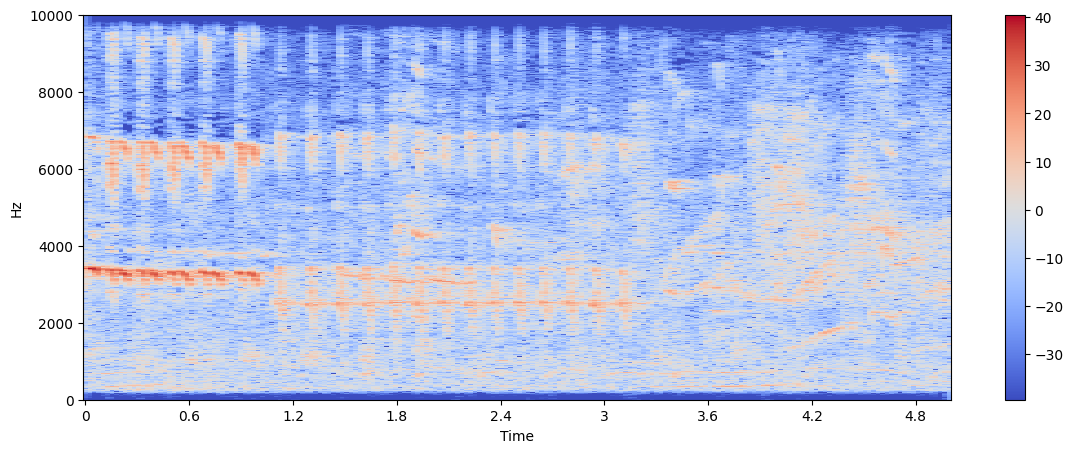

In [ ]:
# Spectrogram : Time - Frequency
# .stft converts data into short term Fourier transform.
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis="time", y_axis="hz")
plt.colorbar()


## **Feature Extraction**

mfccs.shape :  (20, 196)


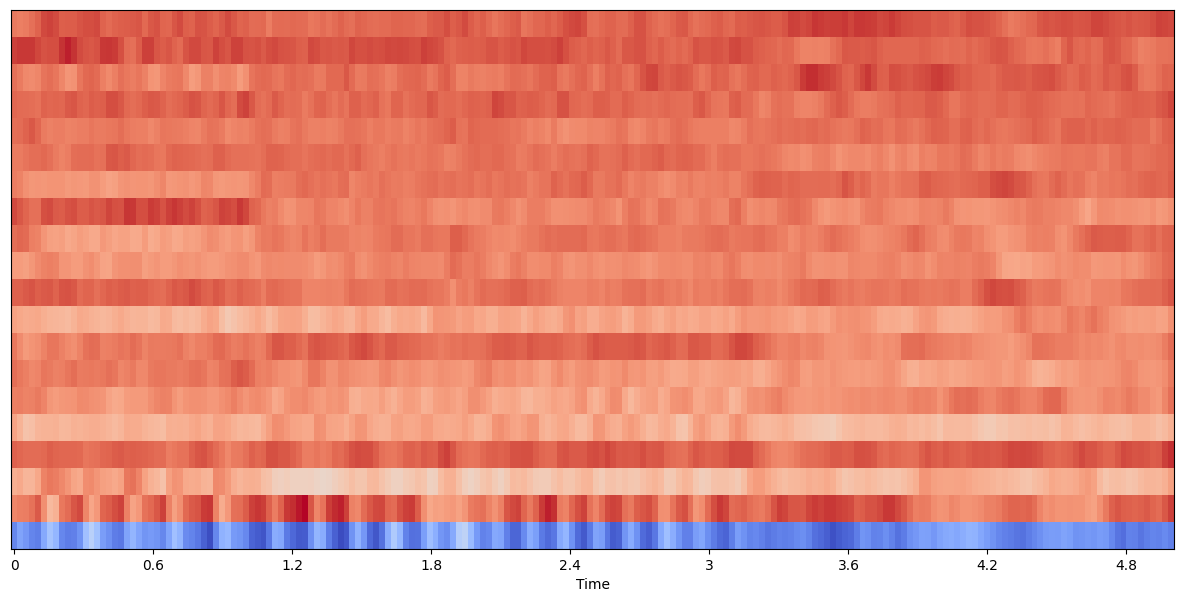

In [ ]:
# Mel-Frequency Cepstral Coefficients(MFCCs)
"""
This feature is one of the most important method to extract a feature of an audio signal
and is used majorly whenever working on audio signals.

The mel frequency cepstral coefficients (MFCCs) of a signal are a small set
of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope.
"""
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print("mfccs.shape : ",mfccs.shape)

# Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis="time")

chromagram.shape :  (12, 196)


[Text(0.5, 1.0, 'Chromagram')]

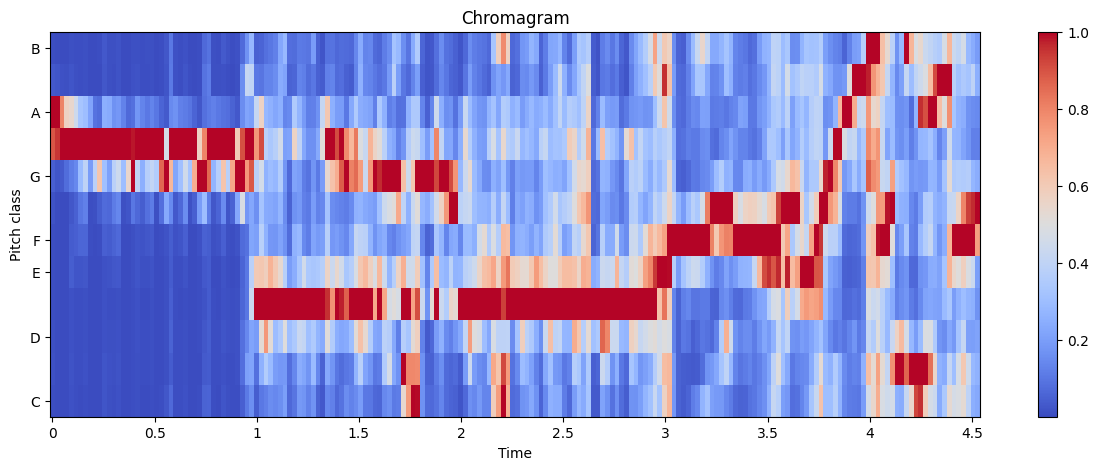

In [ ]:
# Chroma feature
"""
Compute a chromagram from a waveform or power spectrogram.
"""
chromagram = librosa.feature.chroma_stft(y=x, sr=sr)
print("chromagram.shape : ",chromagram.shape)

fig, ax = plt.subplots(figsize=(15, 5))
img = librosa.display.specshow(chromagram, x_axis="time", y_axis="chroma", cmap="coolwarm")
fig.colorbar(img, ax=ax)
ax.set(title="Chromagram")

# **Example**

In [ ]:
# Load dataset
import pandas as pd
df = pd.read_csv("/content/ESC-50-master/meta/esc50.csv")

# Display dimensions of dataframe
print(df.shape)
print(df.info())

print("-----------------------------------------------------------------------")
# Display first 10 records
print(df.head(10))

print("category : \n",df["category"].value_counts())


(2000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB
None
-----------------------------------------------------------------------
            filename  fold  target         category  esc10  src_file take
0   1-100032-A-0.wav     1       0              dog   True    100032    A
1  1-100038-A-14.wav     1      14   chirping_birds  False    100038    A
2  1-100210-A-36.wav     1      36   vacuum_cleaner  False    100210    A
3  1-100210-B-36.wav     1      36   vacuum_cleaner  False    100210    B
4  1-101296-A-19.wav     1      19 

In [ ]:
filenames  = df["filename"]
categories = df["category"]

my_categories = ["cat", "cow", "dog", "sheep"]
# my_categories = ["cat", "dog"]

print("filenames  : ",len(filenames))
print("categories : ",len(categories))


filenames  :  2000
categories :  2000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

#*******************************************************************************
#*******************************************************************************
def read_audios(filenames, categories):
  lst_audios = []
  labels     = []
  for i in range(len(filenames)):
    x , sr = librosa.load("/content/ESC-50-master/audio/"+filenames[i])
    aud = [x, sr]
    lst_audios.append(aud)
    labels.append(categories[i])
  return lst_audios, labels

def read_audios_small(filenames, categories, my_categories):
  lst_audios = []
  labels     = []
  for i in range(len(filenames)):
    if categories[i] in my_categories:
      x , sr = librosa.load("/content/ESC-50-master/audio/"+filenames[i])
      aud = [x, sr]
      lst_audios.append(aud)
      labels.append(categories[i])
  return lst_audios, labels

#*******************************************************************************
#*******************************************************************************

# Load The Dataset
lst_audios, labels = read_audios_small(filenames, categories, my_categories)

print("len lst_audios : ",len(lst_audios))
print("labels : ",labels)

# Encoding Categorical Labels
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
labels = le.fit_transform(labels)
print("labels : ",labels)


len lst_audios :  160
labels :  ['dog', 'dog', 'sheep', 'cow', 'sheep', 'sheep', 'cow', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'cat', 'cat', 'sheep', 'sheep', 'cat', 'cat', 'sheep', 'cow', 'dog', 'cow', 'cow', 'sheep', 'cow', 'cow', 'cat', 'cow', 'dog', 'sheep', 'dog', 'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 'cat', 'cat', 'sheep', 'sheep', 'dog', 'dog', 'dog', 'dog', 'cow', 'cow', 'dog', 'dog', 'sheep', 'sheep', 'sheep', 'dog', 'dog', 'sheep', 'sheep', 'sheep', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cow', 'cow', 'cow', 'cow', 'dog', 'sheep', 'sheep', 'sheep', 'sheep', 'dog', 'cat', 'cat', 'cat', 'cow', 'cow', 'dog', 'dog', 'cow', 'dog', 'cow', 'dog', 'dog', 'dog', 'sheep', 'sheep', 'sheep', 'sheep', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cow', 'cow', 'cow', 'cow', 'cow', 'dog', 'dog', 'dog', 'sheep', 'sheep', 'sheep', 'sheep', 'dog', 'dog', 'dog', 'sheep', 'sheep', 'sheep', 'dog', 'dog', 'cow', 'cow', 'cow', 'sheep', 'cat', 

In [ ]:
# Extracting features
X = []
for i in range(len(lst_audios)):
  elem = lst_audios[i]
  # Mel-Frequency Cepstral Coefficients(MFCCs)
  mfccs = librosa.feature.mfcc(y=elem[0], sr=elem[1])

  mfccs_scaled = np.mean(mfccs.T,axis=0)

  X.append(mfccs_scaled)

X = np.asarray(X)

# Standardization
from sklearn.preprocessing import StandardScaler
my_scaler = StandardScaler()
my_scaler.fit(X)
X_scaled = my_scaler.transform(X)

print(X_scaled.shape)


(160, 20)


In [ ]:
y = np.asarray(labels)

# Split data into train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                test_size= 0.20, random_state=100)
print("X_train : ",X_train.shape,"  X_test : ",X_test.shape)


X_train :  (128, 20)   X_test :  (32, 20)


## **ML**

Classification report : 
               precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.88      0.78      0.82         9
           2       0.80      0.80      0.80        10
           3       0.89      1.00      0.94         8

    accuracy                           0.81        32
   macro avg       0.79      0.79      0.79        32
weighted avg       0.81      0.81      0.81        32

-----------------------------------------------------------------------
Confusion Matrix : 
 [[3 1 0 1]
 [0 7 2 0]
 [2 0 8 0]
 [0 0 0 8]] 

Normalized Confusion Matrix : 
 [[0.6        0.2        0.         0.2       ]
 [0.         0.77777778 0.22222222 0.        ]
 [0.2        0.         0.8        0.        ]
 [0.         0.         0.         1.        ]] 

-----------------------------------------------------------------------


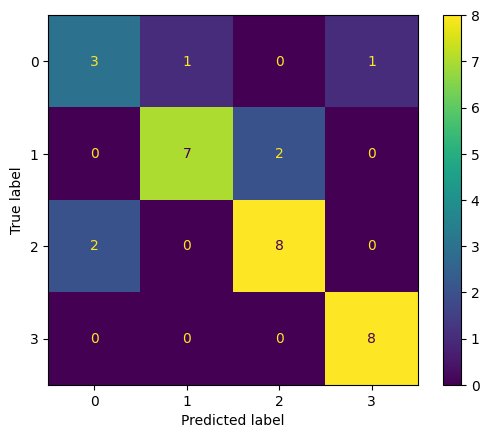

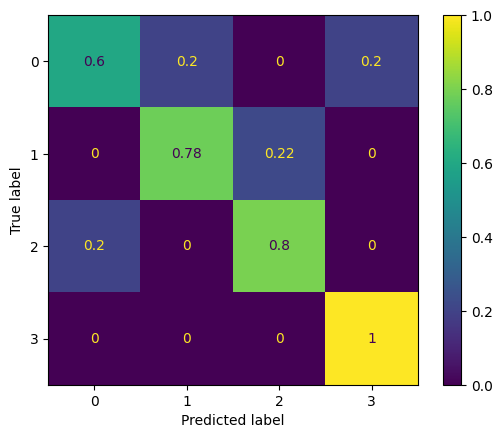

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# training the model on training set
classifier = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=100)

classifier.fit(X_train, y_train)

# making predictions on the testing set
predicted = classifier.predict(X_test)

print("Classification report : \n",  metrics.classification_report(y_test, predicted))
print("-----------------------------------------------------------------------")

cm = confusion_matrix(y_test, predicted, labels=classifier.classes_)
cm_normalize = confusion_matrix(y_test, predicted,
                                labels=classifier.classes_, normalize="true")
print("Confusion Matrix : \n",cm,"\n")
print("Normalized Confusion Matrix : \n",cm_normalize,"\n")

print("-----------------------------------------------------------------------")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp_normalize = ConfusionMatrixDisplay(confusion_matrix=cm_normalize,
                              display_labels=classifier.classes_)
disp.plot()
disp_normalize.plot()


## **DL**

In [ ]:
"""
import tensorflow as tf
from tensorflow import keras

# Creating the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[20,]))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(4, activation="softmax"))
# model.add(keras.layers.Dense(1, activation="sigmoid"))

# The model’s summary() method displays all the model’s layers
print(model.summary())

# Compiling the model
# model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])
model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])

# Training the model
history = model.fit(X_train, y_train, epochs=200, batch_size=40, validation_data=(X_test
                                                                                  , y_test))
"""

'\nimport tensorflow as tf\nfrom tensorflow import keras\n\n# Creating the model\nmodel = keras.models.Sequential()\nmodel.add(keras.layers.Flatten(input_shape=[20,]))\nmodel.add(keras.layers.Dense(256, activation="relu"))\nmodel.add(keras.layers.Dropout(0.5))\nmodel.add(keras.layers.Dense(256, activation="relu"))\nmodel.add(keras.layers.Dropout(0.5))\n\nmodel.add(keras.layers.Dense(4, activation="softmax"))\n# model.add(keras.layers.Dense(1, activation="sigmoid"))\n\n# The model’s summary() method displays all the model’s layers\nprint(model.summary())\n\n# Compiling the model\n# model.compile(loss="binary_crossentropy", optimizer= "adam", metrics=["accuracy"])\nmodel.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])\n\n# Training the model\nhistory = model.fit(X_train, y_train, epochs=200, batch_size=40, validation_data=(X_test\n                                                                                  , y_test))\n'

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print("X_train : ",X_train.shape,"  X_test : ",X_test.shape)


X_train :  (128, 20, 1)   X_test :  (32, 20, 1)


In [ ]:
import tensorflow as tf
from tensorflow import keras

# CNN
model =  keras.models.Sequential()
model.add(keras.layers.Conv1D(128, 5, activation="selu", input_shape=(20,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.Conv1D(256, 3, activation="selu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(keras.layers.MaxPooling1D(3))
model.add(keras.layers.Conv1D(256, 3, activation="selu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))

model.add(keras.layers.Flatten())
layer1 = keras.layers.Dense(64, activation="selu", kernel_initializer="he_normal",
                                kernel_regularizer=keras.regularizers.l2(0.01))
output = keras.layers.Dense(4, activation="softmax", kernel_initializer="glorot_uniform",
                                kernel_regularizer=keras.regularizers.l2(0.01))

model.add(layer1)
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.LeakyReLU(alpha=0.2))
model.add(output)

# The model’s summary() method displays all the model’s layers
print(model.summary())


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 16, 128)        │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 14, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 14, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 2, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 2, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 2, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 332,100 (1.27 MB)

 Trainable params: 330,692 (1.26 MB)

 Non-trainable params: 1,408 (5.50 KB)

None


In [ ]:
# Compiling the model
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                  beta_2=0.999, clipvalue=1.0)
model.compile(loss="sparse_categorical_crossentropy", optimizer= optimizer, metrics=["accuracy"])

# Training the model
history = model.fit(X_train, y_train, epochs=500, batch_size=40,
                                              validation_data=(X_test, y_test))


Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3602 - loss: 2.9836 - val_accuracy: 0.8125 - val_loss: 2.5223
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7650 - loss: 1.9470 - val_accuracy: 0.7188 - val_loss: 2.4191
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8015 - loss: 1.8524 - val_accuracy: 0.7188 - val_loss: 2.3589
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8710 - loss: 1.7370 - val_accuracy: 0.7812 - val_loss: 2.3230
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9290 - loss: 1.6125 - val_accuracy: 0.7500 - val_loss: 2.2981
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9129 - loss: 1.5705 - val_accuracy: 0.8125 - val_loss: 2.2555
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9752 - loss: 1.4575 - val_accuracy: 0.8438 - val_loss: 2.2101
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9292 - loss: 1.4670 - val_accuracy: 0.8438 - val_loss: 

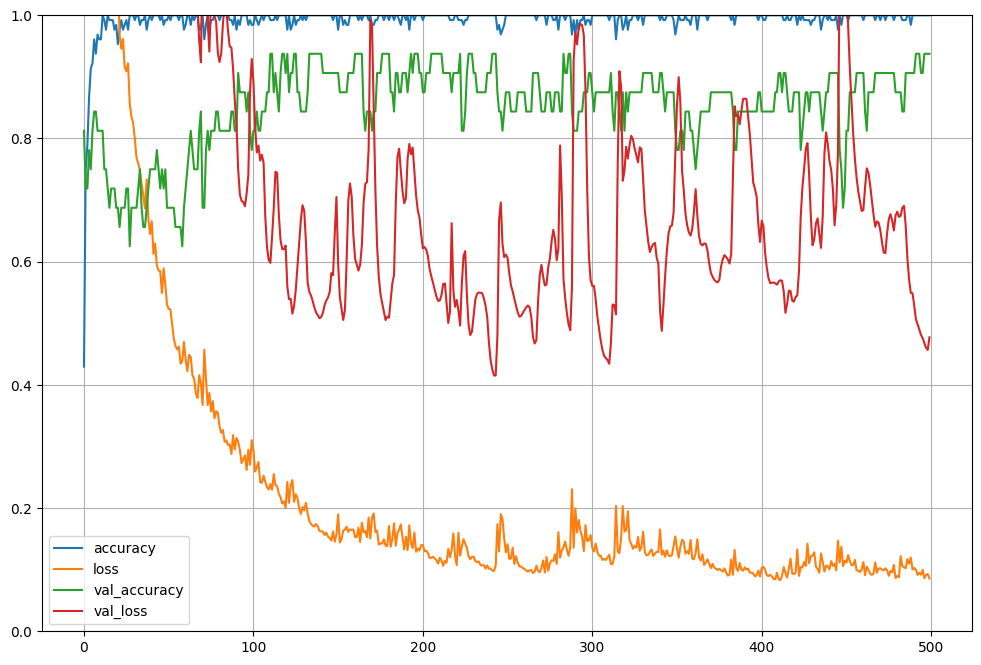

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9375 - loss: 0.4772
Loss     :  0.47724008560180664
accuracy :  0.9375


In [ ]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss     : ",model_evaluate[0])
print("accuracy : ",model_evaluate[1])


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Classification report : 
               precision    recall  f1-score   support

         cat       0.71      1.00      0.83         5
         cow       1.00      1.00      1.00         9
         dog       1.00      0.80      0.89        10
       sheep       1.00      1.00      1.00         8

    accuracy                           0.94        32
   macro avg       0.93      0.95      0.93        32
weighted avg       0.96      0.94      0.94        32

Confusion matrix : 



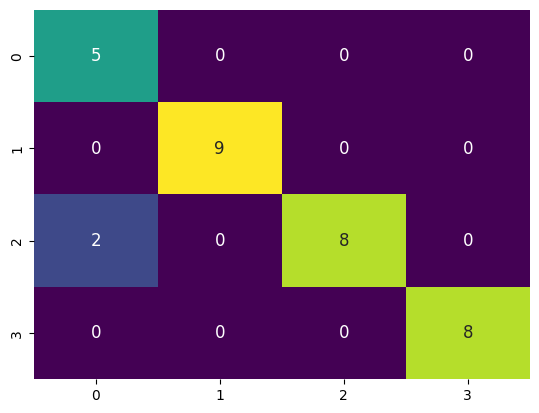

Normalized confusion matrix : 



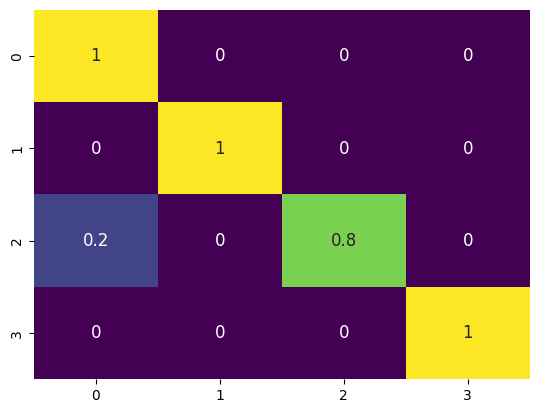

In [ ]:
# Confusion Matrix
# y_pred = (model.predict(X_test) > 0.5).astype("int32").tolist()

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

class_names = ["cat", "cow", "dog", "sheep" ]

# Compute classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification report : \n",classification_report(y_test, y_pred, target_names = class_names))

# Function to draw confusion matrix
import seaborn as sns
def draw_confusion_matrix(true, preds, normalize=None):
  # Compute confusion matrix
  conf_matx = confusion_matrix(true, preds, normalize = normalize)
  conf_matx = np.round(conf_matx, 2)
  # print(conf_matx)

  # plt.subplots(figsize=(14,8))
  sns.heatmap(conf_matx, annot=True, annot_kws={"size": 12},fmt="g", cbar=False, cmap="viridis")
  plt.show()

print("Confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred)

print("Normalized confusion matrix : \n")
draw_confusion_matrix(y_test, y_pred,"true")


# Make predictions
# predicted = model.predict(X_new)

# Save the model
# model.save("/content/my_model.h5")


# **Inference**

In [ ]:
!pip install gradio

## **ML**

In [ ]:
# https://www.gradio.app

import numpy as np
import gradio as gr
import requests

def pad_trunc (mfccs, my_features):
  nbr_features = mfccs.shape[0]
  if nbr_features < my_features:
    pad = my_features - nbr_features
    mfccs = np.pad(mfccs, (0, pad), "constant", constant_values=(0))

  elif nbr_features > my_features:
    trunc = nbr_features - my_features
    for i in range(trunc):
      mfccs = np.delete(mfccs, mfccs_scaled.shape[0]-1)

  return mfccs

def inference(audio):
    labels = ["cat", "cow", "dog", "sheep" ]
    my_features = 20
    aud = audio.name
    x , sr = librosa.load(aud)
    mfccs = librosa.feature.mfcc(y=x, sr=sr)

    mfccs_mean = np.mean(mfccs.T, axis=0)
    mfccs_mean = mfccs_mean.reshape(1, -1)
    mfccs_scaled = my_scaler.transform(mfccs_mean).flatten()

    mfccs_scaled = pad_trunc (mfccs_scaled, my_features)

    mfccs_scaled = mfccs_scaled.reshape(-1, 20)

    pred = classifier.predict_proba(mfccs_scaled).flatten()
    return {labels[i]: float(pred[i]) for i in range(len(labels))}

# sources="upload" or "microphone"
nbr_top_classes = 4
gr.Interface(fn=inference,
             inputs=gr.Audio(sources=["microphone"], type="filepath", label="Input Audio"),
             outputs=gr.Label(num_top_classes=nbr_top_classes),
             theme="dark").launch(share=True) #, debug=True Use in Colab

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/gradio/blocks.py:1069: UserWarning: Cannot load dark. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/dark (Request ID: Root=1-692253ba-3e6eb6bc57876be15e43d360;e86b0e40-70f8-480b-9f05-42ebeba6da75)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6d0db02dc218b7f95a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## **DL**

In [ ]:
import librosa
def pad_trunc (mfccs, my_features):
  nbr_features = mfccs.shape[0]
  if nbr_features < my_features:
    pad = my_features - nbr_features
    mfccs = np.pad(mfccs, (0, pad), "constant", constant_values=(0))

  elif nbr_features > my_features:
    trunc = nbr_features - my_features
    for i in range(trunc):
      mfccs = np.delete(mfccs, mfccs_scaled.shape[0]-1)

  return mfccs

audio_data = "/content/ESC-50-master/audio/1-100038-A-14.wav"
x , sr = librosa.load(audio_data, sr=20000)
mfccs = librosa.feature.mfcc(y=x, sr=sr)
print(mfccs.shape)
mfccs_mean = np.mean(mfccs.T,axis=0)
print(mfccs_mean.shape)
mfccs_mean = mfccs_mean.reshape(1, -1)
mfccs_scaled = my_scaler.transform(mfccs_mean).flatten()
mfccs_scaled = pad_trunc (mfccs_scaled, 20)
print(mfccs_scaled.shape)
mfccs_scaled = mfccs_scaled.reshape(1, 20,1)
print(mfccs_scaled.shape)
pred = model.predict(mfccs_scaled).flatten()
print(pred)

(20, 196)
(20,)
(20,)
(1, 20, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step
[0.07812054 0.1340011  0.6934477  0.09443058]


In [ ]:
# https://www.gradio.app

import tensorflow as tf
from tensorflow import keras
import numpy as np
import gradio as gr
import requests

def pad_trunc (mfccs, my_features):
  nbr_features = mfccs.shape[0]
  if nbr_features < my_features:
    pad = my_features - nbr_features
    mfccs = np.pad(mfccs, (0, pad), "constant", constant_values=(0))

  elif nbr_features > my_features:
    trunc = nbr_features - my_features
    for i in range(trunc):
      mfccs = np.delete(mfccs, mfccs_scaled.shape[0]-1)

  return mfccs

def inference(audio):
    labels = ["cat", "cow", "dog", "sheep" ]
    my_features = 20
    aud = audio.name
    x , sr = librosa.load(aud)
    mfccs = librosa.feature.mfcc(y=x, sr=sr)

    mfccs_mean = np.mean(mfccs.T,axis=0)
    mfccs_mean = mfccs_mean.reshape(1, -1)
    mfccs_scaled = my_scaler.transform(mfccs_mean).flatten()

    mfccs_scaled = pad_trunc (mfccs_scaled, my_features)

    # NN
    # mfccs_scaled = mfccs_scaled.reshape(1, 20)
    # CNN
    mfccs_scaled = mfccs_scaled.reshape(1, my_features, 1)

    pred = model.predict(mfccs_scaled).flatten()
    return {labels[i]: float(pred[i]) for i in range(len(labels))}

# source="upload"  "microphone"
nbr_top_classes = 4
gr.Interface(fn=inference,
             inputs=gr.Audio(sources=["microphone"], type="filepath", label="Input Audio"),
             outputs=gr.Label(num_top_classes=nbr_top_classes),
             theme="dark").launch(share=True) #, debug=True Use in Colab

/usr/local/lib/python3.12/dist-packages/gradio/blocks.py:1069: UserWarning: Cannot load dark. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/dark (Request ID: Root=1-69225499-427445ec587da508233e2bae;adf63b74-6d00-41e9-a59f-1dd362f9316c)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5c430905c07864dd41.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
